'''Again, on the same dataset. Cluster similar houses together. Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt '''




      Data cleaning & getting rid of irrelevant information before clustering
      Finding the optimal value of k
      Storing cluster to which the house belongs along with the data

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


# Data Cleaning

In [81]:
df.corr().loc['Price' , :] 


#Un named column is useless
#sqft, Bathroom,  Bedroom columns have good co relation with Price as a target variable
#Floor, TotalFloor, Living.Room has quite less co relation column has 

Unnamed: 0    -0.077512
Sqft           0.825514
Floor          0.244553
TotalFloor     0.333631
Bedroom        0.467059
Living.Room    0.328788
Bathroom       0.605542
Price          1.000000
Name: Price, dtype: float64

In [82]:
df.drop_duplicates()


#The size is 645 again so there are no duplicates

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


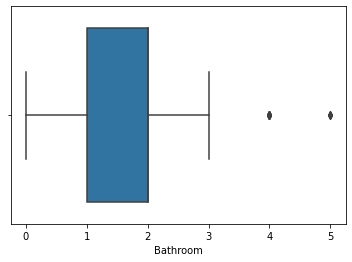

In [83]:
import seaborn as sns
sns.boxplot(data= df, x= 'Bathroom')


#our data set has 4, 5 bathrooms as outliers so we need not to use them

In [84]:
df = df.loc[df['Bathroom'] <= 3]
df


#Thus records with 4,5 Bathrooms as outliers are deleted

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


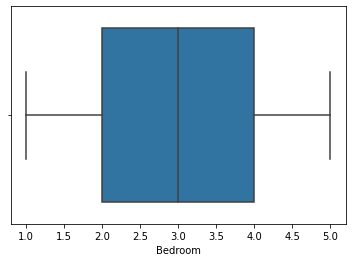

In [85]:
sns.boxplot(data= df, x= 'Bedroom')


#There are no outliers in Bedroom data

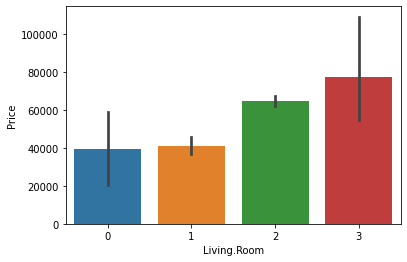

In [86]:
sns.barplot(data = df, x= 'Living.Room', y='Price')


#There is a week insigh that the price is more with more living rooms

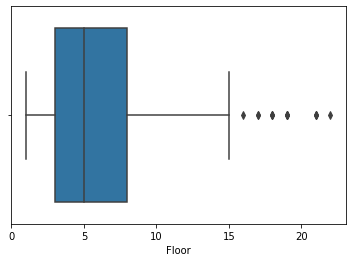

In [87]:
sns.boxplot(data= df, x= 'Floor')


#There are outliers above 15 floors
#we can delete those records as per our convenience because there are chances for a house to have more than 15 floors


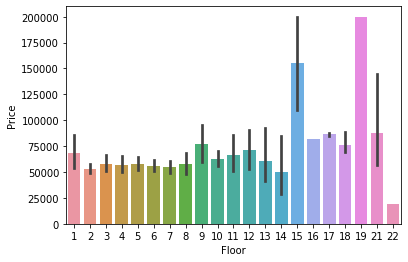

In [88]:
sns.barplot(data = df, x= 'Floor', y='Price')


#There are fluctuations in price after 15 floors so they might be the outliers so we can remove them now

In [99]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [100]:
#Standard normal scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


data_scaled = scaler.fit_transform(df)

data_scaled = pd.DataFrame(data_scaled)

data_scaled.columns= df.columns

In [102]:
data_scaled.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,-0.435248,-1.035320,-0.766520,-0.819533,0.445377,0.422637,0.056550
1,0.922365,-0.225125,-0.766520,1.240727,0.445377,0.422637,0.534912
2,-0.490764,-0.225125,-0.766520,-0.819533,0.445377,-1.309077,-0.063041
3,-0.036544,-1.035320,-0.766520,0.210597,0.445377,0.422637,-0.451711
4,-0.733015,1.395264,0.663864,0.210597,0.445377,0.422637,-0.451711


#Finding a better value of k for clustering

In [103]:
!pip install sklearn

In [104]:
from sklearn.metrics import mean_squared_error 
from sklearn.cluster import KMeans
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
#To find best K value using sum of square errors

from sklearn.cluster import KMeans

cost = []
for i in range(1, 10):
  model = KMeans(n_clusters = i)
  model.fit(data_scaled)
  cost.append(model.inertia_)

cost

[4416.999999999998,
 3022.8820818001077,
 2397.245872685773,
 2098.396243104121,
 1838.9908958657315,
 1684.3123377487977,
 1555.2955582463187,
 1455.3555969395893,
 1378.1645300250348]

Text(0.5, 1.0, 'Cost function')

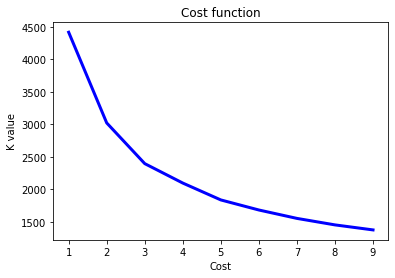

In [106]:
plt.plot(range(1, 10), cost, color ='b', linewidth ='3')
plt.xlabel('Cost')
plt.ylabel('K value')
plt.title('Cost function')


#K= 5 is the optimum value of K

In [112]:
my_model = KMeans(n_clusters= 5)
identified_clusters = my_model.fit_predict(data_scaled)
identified_clusters


data_with_clusters = data_scaled.copy()
data_with_clusters['Cluster'] = identified_clusters  

data_with_clusters

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
0,-0.435248,-1.035320,-0.766520,-0.819533,0.445377,0.422637,0.056550,2
1,0.922365,-0.225125,-0.766520,1.240727,0.445377,0.422637,0.534912,2
2,-0.490764,-0.225125,-0.766520,-0.819533,0.445377,-1.309077,-0.063041,4
3,-0.036544,-1.035320,-0.766520,0.210597,0.445377,0.422637,-0.451711,2
4,-0.733015,1.395264,0.663864,0.210597,0.445377,0.422637,-0.451711,0
...,...,...,...,...,...,...,...,...
626,-0.177857,0.315004,0.868205,0.210597,0.445377,0.422637,-0.451711,0
627,-1.570799,-0.495190,-0.153498,-1.849663,-1.785043,-1.309077,-1.055643,1
628,-1.056016,1.935394,0.663864,-1.849663,-1.785043,-1.309077,-0.451711,1
629,0.316738,-0.765255,0.663864,0.210597,0.445377,0.422637,0.146243,2
